<a href="https://colab.research.google.com/github/younesabdolmalaky/Pistachio/blob/main/FeaturesClassicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imblearn

In [ ]:
!pip install catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [85]:
import pickle
import catboost as cb
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [4]:
with open('/content/drive/MyDrive/Pistachio/Kirmizi_Pistachio_train1.pickle', 'rb') as f:
    Kirmizi_Pistachio_train = pickle.load(f)

with open('/content/drive/MyDrive/Pistachio/Siirt_Pistachio_train1.pickle', 'rb') as f:
    Siirt_Pistachio_train = pickle.load(f)

with open('/content/drive/MyDrive/Pistachio/Kirmizi_Pistachio_test1.pickle', 'rb') as f:
    Kirmizi_Pistachio_test = pickle.load(f)

with open('/content/drive/MyDrive/Pistachio/Siirt_Pistachio_test1.pickle', 'rb') as f:
    Siirt_Pistachio_test = pickle.load(f)

In [8]:
PixelFeaturesSiirttrain1 = pd.DataFrame(Kirmizi_Pistachio_train)
PixelFeaturesSiirttrain2 = pd.DataFrame(Siirt_Pistachio_train)
PixelFeaturesSiirttest1 = pd.DataFrame(Kirmizi_Pistachio_test)
PixelFeaturesSiirttest2 = pd.DataFrame(Siirt_Pistachio_test)

In [40]:
PixelFeaturesSiirttrain1['class'] = 0
PixelFeaturesSiirttrain2['class'] = 1
PixelFeaturesSiirttest1['class'] = 0
PixelFeaturesSiirttest2['class'] = 1

In [41]:
PixelFeaturesSiirttrain = pd.concat([PixelFeaturesSiirttrain1, PixelFeaturesSiirttrain2])
PixelFeaturesSiirttest = pd.concat([PixelFeaturesSiirttest1, PixelFeaturesSiirttest2])

In [42]:
PixelFeaturesSiirttrain = PixelFeaturesSiirttrain.drop('names' , axis = 1)
PixelFeaturesSiirttest = PixelFeaturesSiirttest.drop('names' , axis = 1)

In [74]:
y_train = PixelFeaturesSiirttrain['class']
X_train = PixelFeaturesSiirttrain.drop('class' , axis = 1).iloc[:, 20:48]
y_test = PixelFeaturesSiirttest['class']
X_test = PixelFeaturesSiirttest.drop('class' , axis = 1).iloc[:, 20:48]

<Axes: >

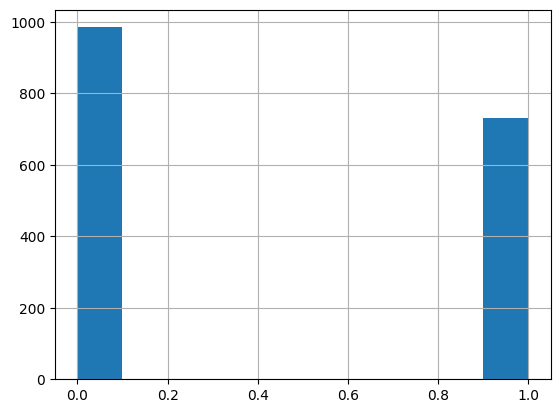

In [76]:
PixelFeaturesSiirttrain['class'].hist()

In [77]:
X_train

,20,21,22,23,24,25,26,27,28,29,...,38,39,40,41,42,43,44,45,46,47
0,76945.0,1193.3210,469.8468,214.3867,0.8898,313.0007,0.9524,80789.0,0.7245,2.1916,...,196.6991,26.2396,26.5541,23.7049,-0.7495,-0.8172,-0.5748,2.6191,2.6852,2.3521
1,67867.0,1821.1560,425.1305,220.2232,0.8554,293.9574,0.9025,75195.0,0.7140,1.9305,...,194.1964,17.7874,17.4780,16.7636,-0.4223,-0.2720,-0.2523,3.1070,3.2185,3.9871
2,76715.0,1163.7260,439.6134,226.2123,0.8574,312.5325,0.9817,78143.0,0.7481,1.9434,...,184.7175,21.1586,21.0102,21.6313,-0.6941,-0.4818,-0.3975,3.4168,3.2742,3.2425
3,79642.0,1144.6030,463.9503,221.3451,0.8789,318.4389,0.9902,80431.0,0.7782,2.0960,...,189.4863,23.4901,25.6410,26.6423,-0.7871,-0.5287,-0.3032,2.6744,2.2202,1.9222
4,65874.0,1700.9301,442.3879,210.5656,0.8795,289.6090,0.8907,73961.0,0.7165,2.1010,...,196.4848,25.2135,26.7851,26.8374,-0.8116,-0.7447,-0.5696,2.7527,2.6221,2.3447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,89084.0,2043.2350,424.6149,284.7247,0.7419,336.7867,0.9113,97758.0,0.7534,1.4913,...,197.1373,21.2523,22.6418,19.7280,-0.7327,-0.7323,-0.9617,2.9888,2.7660,3.7567
728,77562.0,2216.4470,464.2564,227.8966,0.8712,314.2531,0.9085,85375.0,0.6094,2.0371,...,195.2540,22.4017,24.6530,23.0531,-1.1141,-0.9940,-0.8077,3.3086,3.0744,3.0565
729,98748.0,1202.0850,443.2601,284.5458,0.7668,354.5841,0.9880,99952.0,0.7643,1.5578,...,182.9577,19.9447,19.7135,19.9747,-0.8751,-0.8048,-0.5749,2.9762,2.8648,3.7368
730,59867.0,1999.6479,418.0183,236.0217,0.8254,276.0888,0.8029,74562.0,0.5567,1.7711,...,182.3957,18.3680,18.3367,15.8968,-0.7564,-0.7940,-0.6092,2.7778,2.8861,2.5526


In [78]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

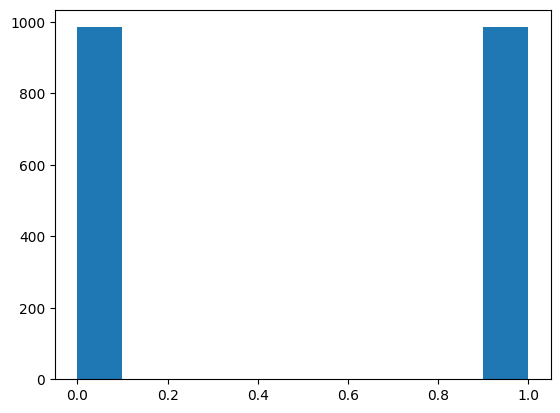

In [79]:
plt.hist(y_train_res)
plt.show()

In [80]:
clf =  cb.CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6 , verbose = 0)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       247
           1       0.89      0.93      0.91       184

    accuracy                           0.92       431
   macro avg       0.92      0.92      0.92       431
weighted avg       0.92      0.92      0.92       431



In [81]:
y_train = PixelFeaturesSiirttrain['class']
X_train = PixelFeaturesSiirttrain.drop('class' , axis = 1)
y_test = PixelFeaturesSiirttest['class']
X_test = PixelFeaturesSiirttest.drop('class' , axis = 1)

In [82]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [83]:
clf =  cb.CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6 , verbose = 0)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       247
           1       0.96      0.98      0.97       184

    accuracy                           0.97       431
   macro avg       0.97      0.97      0.97       431
weighted avg       0.97      0.97      0.97       431

